# Regresión Logística Multinomial
## Sergio García Prado

## Ajuste Multinomial
Utilizando las tablas de datos en los ficheros datos1 y datos2 ajusta un modelo de regresión
logística multinomial para predecir el grupo de pertenencia (Y) en función de las variables
explicativas (X1,X2) (Para ello utiliza una modelización tipo Y~X1+X2).

Obtén intervalos de confianza al 95% para los coeficientes de las variables explicativas en el
modelo ajustado por el método de Wald y por el correspondiente a la verosimilitud perfil.

Obtén intervalos de confianza al 95% para la probabilidad de pertenecer al grupo 2 en relación
a la probabilidad de pertenecer al grupo 1 en los valores observados de las variables explicativas.

Para los valores observados de las variables explicativas obtén estimaciones de la probabilidad
de pertenecer a cada uno de los tres grupos.

Clasifica cada individuo al grupo para el que tiene mayor probabilidad a posteriori de pertenecer
y evalúa la clasificación obtenida

Ajusta otros modelos logísticos a los datos y selecciona el que parezca más interesante.

In [1]:
rm(list = ls())

### Datos 1

In [8]:
datos1 <- read.table('data/datos1.txt', header = TRUE)

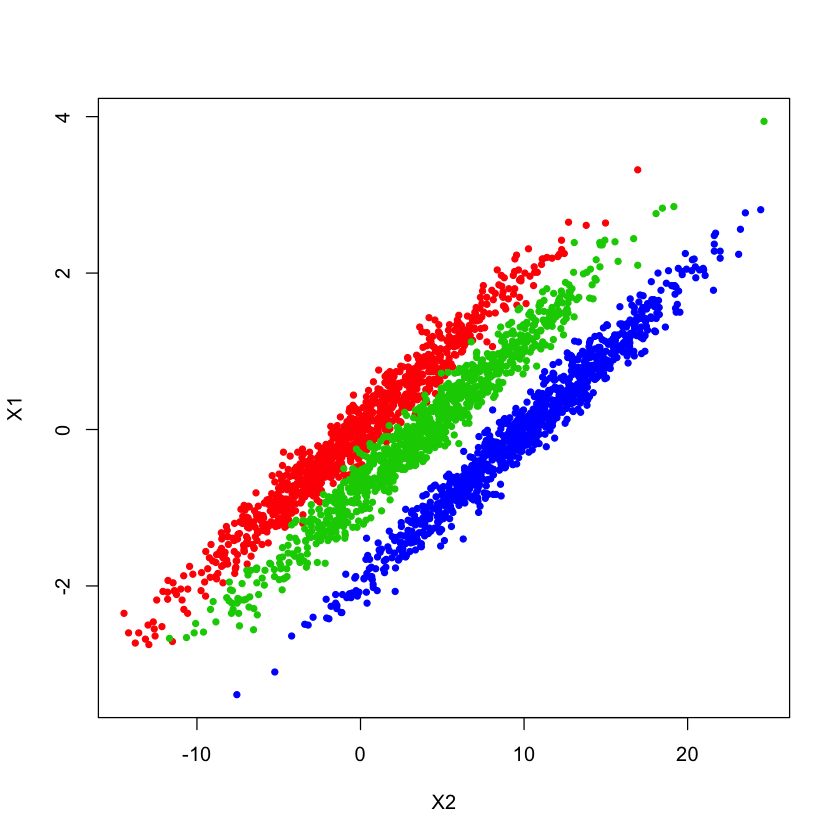

In [37]:
plot(X1 ~ X2, col = G + 1, data = datos1, pch=20)

### Datos 2

In [ ]:
datos2 <- read.table('data/datos2.txt', header = TRUE)

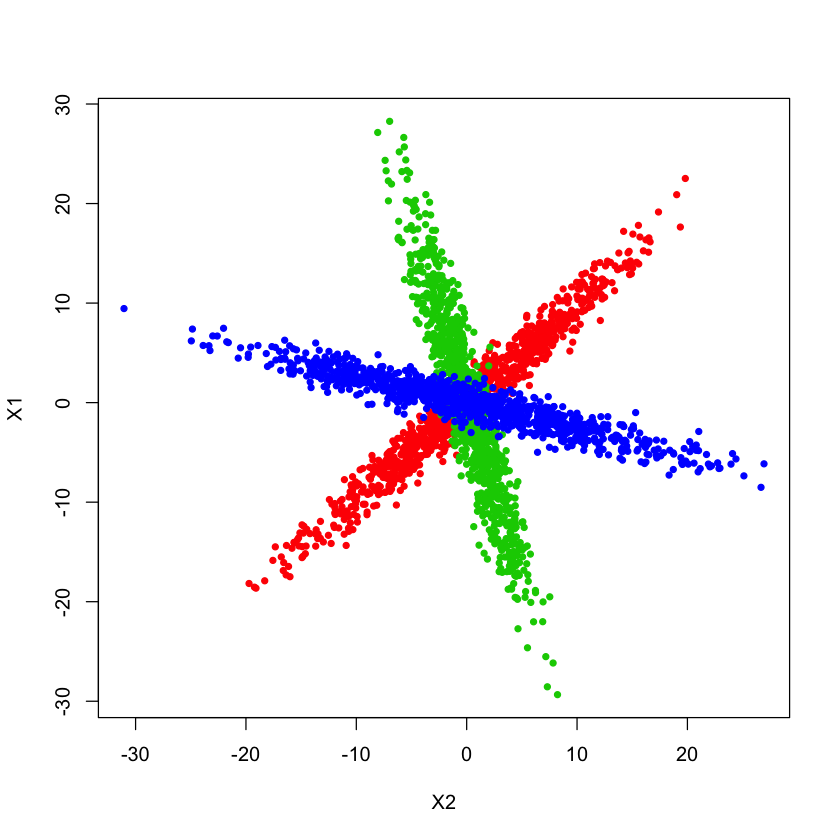

In [35]:
plot(X1 ~ X2, col = Y + 1, data = datos2, pch = 20)

## Simulación

Una justificación para el modelo de odds proporcionales en la modelización por regresión
logística de la relación entre una variable respuesta cualitativa y una variable explicativa
numérica corresponde a que la variable cualitativa provenga de categorizar una variable
numérica con una distribución logística.

Simula 5000 observaciones de este modelo: distribución logística relacionada linealmente con
una variable numérica y categoriza la variable numérica en 4 grupos. Ajusta una regresión
logística multinomial de odds proporcionales a estos datos y relaciona las estimaciones de los
parámetros con los parámetros simulados.

In [19]:
n <- 5000
k <- 4

In [31]:
(n.sampled <- c(rmultinom(1, size=n,prob=rep(1, 4)/4)))

[1] 1272 1291 1176 1261

In [58]:
GenerateSample <- function(n.sampled, min, max) {
    k <- length(n.sampled)
    l <- sapply(1:k, function(i) {
        cbind(i, runif(n.sampled[i], min, max))
    })
    df <- as.data.frame(do.call("rbind", l))
    colnames(df) <- c('Y', 'X')
    return(df)
}

In [59]:
a <- GenerateSample(n.sampled, -50, 50)

In [62]:
plot(0, GenerateSample(n.sampled, -50, 50)$X)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [33]:
cbind(1, runif(n.sampled[1], -50, -25))

1,-46.84297
1,-36.53461
1,-31.81034
1,-38.19933
1,-42.69306
1,-46.05273
1,-33.90744
1,-37.18882
1,-49.53646
1,-28.76940
1,-29.03411


In [ ]:
runif(n.sampled[1], -50, -25), runif(n.sampled[2], -25, 0), runif(nsampled[3], 0, 25), runif(nsampled[4], 25,50)